# Image Classification (digits)

In [1]:
# 1. Import Data
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

C:\Python36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


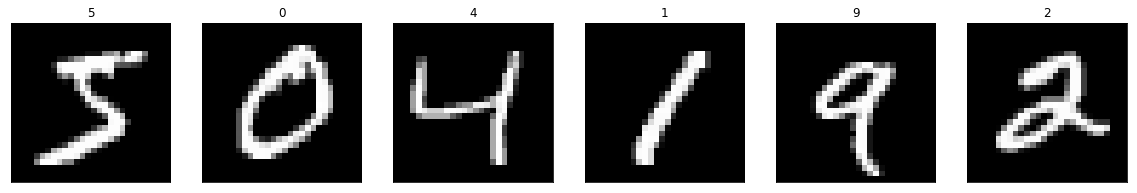

In [2]:
# 2. Visualize the first 6 training images
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import numpy as np

fig = plt.figure(figsize=(20,20))
for i in range(6):
    ax = fig.add_subplot(1,6, i+1, xticks=[], yticks=[])
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title(str(y_train[i]))

In [3]:
# 3. How does computer distinguish numbers? (0 = black, 255 = white where the text is, any number in between could also mean text is written)
# 4. Rescale the images from [0-255] to [0-1] 

X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

In [4]:
# 5. Change the categorical data into one-hot scheme (so instead of number 7, have it represent as 0000000100) <= Preprocessing
from keras.utils import np_utils

print('Integer-valued labels: ')
print(y_train[:10])

y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

print('One-hot labels: ')
print(y_train[:10])

Integer-valued labels: 
[5 0 4 1 9 2 1 3 1 4]
One-hot labels: 
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [5]:
# 6. Can we use the NN we learnt in the previous lesson here? NOPE bc it requires inputs as vectors (so convert matrixes into vectors)
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout

model = Sequential()
model.add(Flatten(input_shape=X_train.shape[1:])) #convert matrix to vector
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [6]:
# 7. Compile the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [7]:
# 8. Calculate the accuracy on TEST before training the model (doesn't expect a hi)

score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]

print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 12.2900%


In [8]:
# 9. Train the model
#ModelCheckpoint = allows you save the best accuracy in that file path for each epoch
#While fitting the model, you can split a 0.2 of the data as validation set
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='mnist.model.best.hdf5', verbose=0, save_best_only=True)
hist = model.fit(X_train, y_train, batch_size=128, epochs=10, validation_split=0.2, callbacks=[checkpointer], verbose=0, shuffle=True)


In [9]:
# 10. Load the weights that gave the best accuracy on the validation set

model.load_weights('mnist.model.best.hdf5')

In [10]:
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]

print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 98.1800%
